<a href="https://colab.research.google.com/github/ale29ruf/Progetto_Data_Mining/blob/main/ProgettoACI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Parte in cui descriviamo il dataset, le features e il loro significato, il numero di istanze.

L'obiettivo in termini predittivi è determinare se una persona guadagna oltre $50K all'anno.

Come prima operazione importiamo il dataset.

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving adult.csv to adult.csv


In [2]:
# Supponiamo che il file caricato si chiami 'nomeFile.csv' (controllare nella sezione File a sinistra)
data = pd.read_csv('adult.csv')

Al fine di valutare la qualità del dataset, si è fatto uso di due metodi molto generali: "describe()" e "info()". Il primo fornisce una sintesi statistica del dataset, il secondo invece fornisce informazioni sulla tipologia di dati che costituisce il datase, utile per individuare la presenza di valori mancanti.

In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Cleaning and Preparation

In questa sezione eseguiremo alcune operazioni preliminarie ma molto significative, quali cleaning, trasformazioni e altro, se necessarie, in modo da rendere il dataset significativo per l'esecuzione dei modelli.

### Gestire dati mancanti

In [4]:
nulls = data.isnull()
nulls.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


Sembra non esserci alcun dato mancante quindi possiamo saltare la parte di filtraggio delle corrispettive istanze.

### Rimozione di istanze duplicate

Ci sono svariati motivi per cui un dataset possa contenere duplicati, ad esempio se è ottenuto attraverso il marging di più dataset.   
A tal proposito si fa uso del metodo "duplicated()" di Pandas che restituisce true per un'istanza se è un duplicato di un'altra istanza, cioè se esiste un'altra istanza con diverso indice tale per cui ogni valore per colonna risulta essere uguale.

In [5]:
duplicated = data.duplicated() # return a mask
duplicated.describe()

# Visualizzo eventualmente le istanze duplicate
#duplicate_rows = data[duplicated]
#print(duplicate_rows)

count     32561
unique        2
top       False
freq      32537
dtype: object

Notiamo che 32537/32561 istanze hanno valore False, ciò significa che 24 istanze sono duplicate. Procediamo con la rimozione di queste.

In [6]:
new_data = data.drop_duplicates()
duplicated = new_data.duplicated()
duplicated.describe()

count     32537
unique        1
top       False
freq      32537
dtype: object

Notiamo che a questo punto ogni istanza ha valore a False.

#### Trasformazione del dataset

Ci vogliamo assicurare che i valori delle feature categoriche siano effettivamente quelli presenti nelle varie istanze, evitando situazioni di inconsistenza dovute a lettere minuscole o maiuscole, spazi o altro.   
Ovviamente come riferimento si considerano le informazioni fornite da coloro che hanno caricato il dataset.  
Si visualizza in prima battuta tutte le distribuzioni delle feature categoriche.

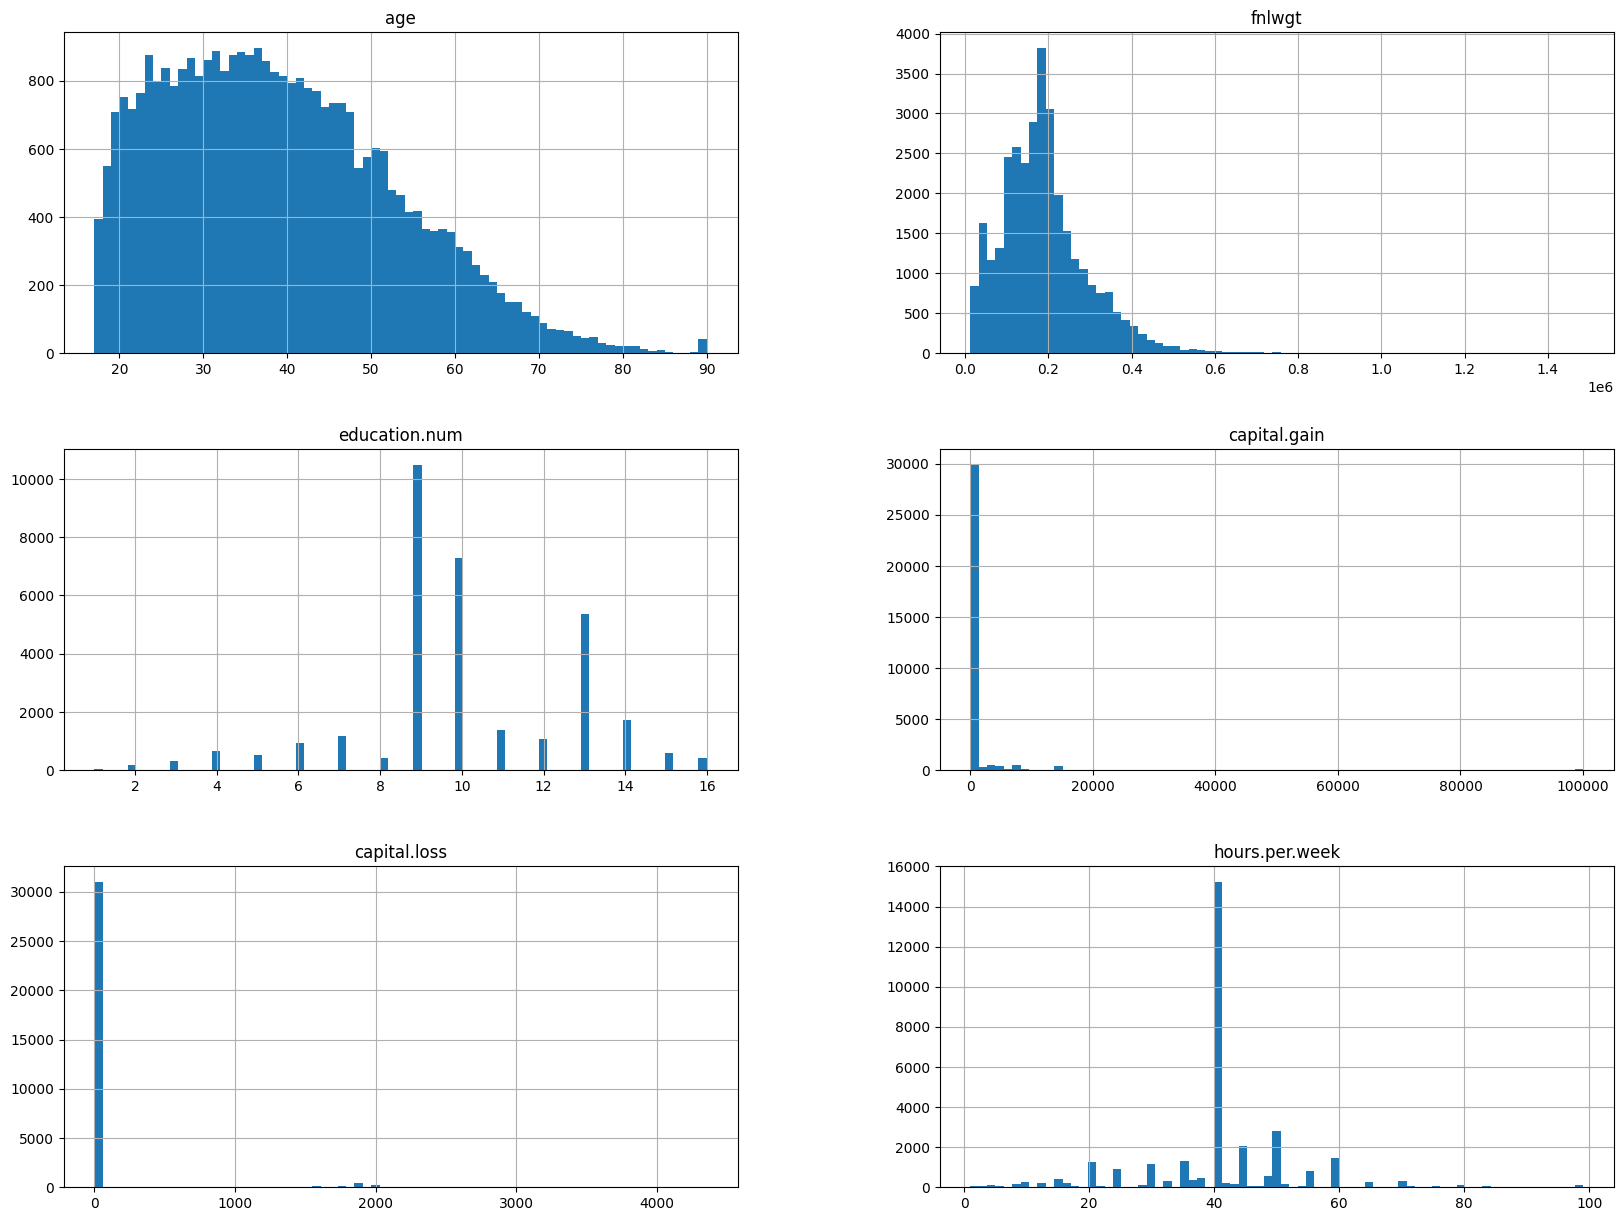

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
new_data.hist(bins=73, figsize=(20,15))
plt.show()

Il capital gain rappresenta i profitti realizzati dalla vendita di beni o investimenti e in questo contesto indica precisamente la somma totale dei profitti ottenuti da tali vendite durante un periodo di tempo specifico (di solito un anno). Al contrario il capital loss rappresenta le perdite subite.
Sembra intuitivo che se una persona presenta un capital.gain positivo, abbia un valore di capital.loss nullo, e viceversa. Di seguito verifichiamo che per ciascuna istanza del dataset almeno uno tra capital.loss e capital.gain sia nullo.

In [8]:
verifica_capital = (new_data['capital.gain'] == 0) | (new_data['capital.loss'] == 0)
print(verifica_capital.all())

True


La feature **'fnlwgt' è un peso statistico** **assegnato a ciascuna istanza in un dataset demografico per garantire che il campione estratto rappresenti accuratamente la popolazione di interesse**. Questo peso è calcolato utilizzando metodi avanzati di campionamento e stratificazione per garantire che l'analisi dei dati rifletta in modo equo la diversità della popolazione.
Verifichiamo a cosa corrispondono le istanze che hanno un valore di fnlwgt maggiore di 1.

In [9]:
tmp = new_data[new_data['fnlwgt']/1000000>1]
tmp.count()

age               13
workclass         13
fnlwgt            13
education         13
education.num     13
marital.status    13
occupation        13
relationship      13
race              13
sex               13
capital.gain      13
capital.loss      13
hours.per.week    13
native.country    13
income            13
dtype: int64

Dato che la feature rappresenta un peso scalato in un range che va da 0 a 10^6, i valori di "fnlwgt" maggiori di 10^6 sembrerebbero delle inconsistenze e pertanto avendo solo 13 istanze con questo valore si è deciso di rimuoverle.

In [10]:
new_data = new_data[new_data['fnlwgt']/1000000<=1]

Per l'analisi del dataset si è deciso di considerare la feature "final weight" superflua per diverse ragioni elencate nel seguito:
- il modello è finalizzato a fare previsioni sulle singole istanze, quindi l'inclusione di questi pesi potrebbe distorcere i risultati. Per esempio, l'algoritmo potrebbe imparare a sovrastimare l'importanza di certe istanze basandosi sul peso piuttosto che sulle altre caratteristiche informative.
- rimuovere feature non strettamente necessarie rende il modello più semplice e comprensibile, facilitando l'interpretazione dei risultati.

In [11]:
new_data.drop(columns=['fnlwgt'], inplace=True)

### Analisi delle persone over age che lavorano
A questo punto consideriamo le persone over age che lavorano. Attualmente l'età media di ritiro dalla vita lavorativa è di 64 anni per gli uomini e di 62 anni per le donne. <br>
E' bene verificare prima alcune cose:
1. La variabile "age" influenza molto la variabile target?
2. Quanto vale il corrispettivo fnlwgt per le tuple che si vuole eliminare?
3. La distribuzione della variabile target risente di uno sbilanciamento?

In [ ]:
# Per l'analisi di correlazione eseguo prima la codifica one hot almeno sulla variabile target
one_hot_income = pd.get_dummies(new_data['income'])
new_data = pd.concat([new_data, one_hot_income], axis=1)
#new_data = new_data.drop('income', axis=1)
new_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,<=50K,>50K
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,True,False
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,True,False
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,True,False
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,True,False
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,True,False


In [ ]:
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K             -1.000000
education.num    -0.335166
age              -0.234051
hours.per.week   -0.229543
capital.gain     -0.223319
capital.loss     -0.150529
fnlwgt            0.009432
<=50K             1.000000
Name: <=50K, dtype: float64

In [ ]:
corr_matrix[">50K"].sort_values()

<=50K            -1.000000
fnlwgt           -0.009432
capital.loss      0.150529
capital.gain      0.223319
hours.per.week    0.229543
age               0.234051
education.num     0.335166
>50K              1.000000
Name: >50K, dtype: float64

Sicuramente la feature "age" ha una buona correlazione nello spiegare la variabile target, se paragonata alle altre. Valutiamo il valore di "fnlwgt" medio per capire se le istanze sono molto rappresentative della popolazione statistica.

In [ ]:
filtered_data = new_data[new_data['age'] > 80]
filtered_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,85.857143,164142.897959,9.306122,1104.744898,177.091837,29.500000
std,3.895543,85082.897239,3.462340,3866.306691,745.408600,18.387159
min,81.000000,29441.000000,2.000000,0.000000,0.000000,1.000000
25%,82.000000,99127.000000,9.000000,0.000000,0.000000,15.000000
50%,85.000000,151030.000000,9.000000,0.000000,0.000000,30.000000
75%,90.000000,212066.250000,13.000000,0.000000,0.000000,40.000000
max,90.000000,403910.000000,15.000000,20051.000000,4356.000000,99.000000


Sembra che tutto sommato non sono poi così poco rilvenati dato che solo 98 tuple rappresentano mediamente il 16% della popolazione, considerando anche che l'intero campione è composto da 32524 istanze che dovrebbe rappresentare il restante 84%. <br>
Consideriamo invece come varia la variabile target nel caso in cui decidessimo di rimuovere queste tuple.

In [ ]:
filtered_data = new_data[new_data['age'] < 80]

new_data_freq = new_data[['<=50K', '>50K']].sum()
filtered_data_freq = filtered_data[['<=50K', '>50K']].sum()
print()
print("new_data:")
print("<=50K: ", new_data_freq['<=50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print(">50K: ", new_data_freq['>50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print()
print("filtered_data:")
print("<=50K: ", filtered_data_freq['<=50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))
print(">50K: ", filtered_data_freq['>50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))


new_data:
<=50K:  0.7590702250645677
>50K:  0.2409297749354323

filtered_data:
<=50K:  0.7586717689174176
>50K:  0.2413282310825824


Le distribuzioni rimarrebbero abbastanza inalterate. <br>
In questa prima fase esplorativa si è deciso comunque di mantenere le tuple all'interno del dataset.

### Analisi delle persone che lavorano troppe ore a settimana
L'obiettivo in questo caso è identificare le persone che lavorano troppe ore a settimana ed eventualemente considerarle come outlayer, e dunque rimuoverle. <br>
In media si lavora 40 ore a settimana, e questo dato torna nella distribuzione della feature, tuttavia vogliamo essere certi di non star includendo degli outlayer nel dataset. Già con 80 ore settimanali, se si considerano lavorativi anche il Sabato e la Domenica, si arriva a circa 11 ore al giorno.

In [ ]:
filtered_data = new_data[new_data['hours.per.week']>80]
filtered_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,41.721154,164698.163462,9.971154,629.716346,122.201923,92.543269
std,12.115752,104270.797412,2.966664,2416.850640,499.855010,6.556190
min,19.000000,20109.000000,2.000000,0.000000,0.000000,81.000000
25%,33.000000,81310.000000,9.000000,0.000000,0.000000,85.000000
50%,40.000000,160979.500000,9.000000,0.000000,0.000000,95.000000
75%,50.000000,221401.500000,12.000000,0.000000,0.000000,99.000000
max,90.000000,511289.000000,16.000000,15024.000000,2559.000000,99.000000


Si noti come il nuemro di istanze in questo caso è 208, tuttavia il valore medio di "fnlwgt" è di circa il 16% ! Verifichiamo com'è correlata la variabile con quelle target e se le distribuzioni di queste cambiano di molto nel caso in cui le rimuovessimo.

In [ ]:
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K             -1.000000
education.num    -0.335166
age              -0.234051
hours.per.week   -0.229543
capital.gain     -0.223319
capital.loss     -0.150529
fnlwgt            0.009432
<=50K             1.000000
Name: <=50K, dtype: float64

In [ ]:
corr_matrix[">50K"].sort_values()

<=50K            -1.000000
fnlwgt           -0.009432
capital.loss      0.150529
capital.gain      0.223319
hours.per.week    0.229543
age               0.234051
education.num     0.335166
>50K              1.000000
Name: >50K, dtype: float64

Effettivamente la correlazione è buona! <br>
Rivalutiamo la variazione delle variabili target.

In [ ]:
filtered_data = new_data[new_data['hours.per.week']<=80]

new_data_freq = new_data[['<=50K', '>50K']].sum()
filtered_data_freq = filtered_data[['<=50K', '>50K']].sum()
print()
print("new_data:")
print("<=50K: ", new_data_freq['<=50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print(">50K: ", new_data_freq['>50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print()
print("filtered_data:")
print("<=50K: ", filtered_data_freq['<=50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))
print(">50K: ", filtered_data_freq['>50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))


new_data:
<=50K:  0.7590702250645677
>50K:  0.2409297749354323

filtered_data:
<=50K:  0.7594689936873376
>50K:  0.24053100631266247


Sembra non alterare affatto la distribuzione. <br>
Tutto sommato è meglio tenerla almeno in questa prima fase di analisi esplorativa.

### Permutazioni e campionamento casuale

In generale, i dataset possono essere caratterizzati da un ordinamento ben preciso, e questo comporta errori nella regressione o classificazione. Per risolvere questa problematica si effettua una permutazione delle tuple.

In [12]:
import numpy as np

np.random.seed(42)
data_1 = new_data.copy()

In [13]:
new_data = data_1.sample(frac=1, random_state=42).reset_index(drop=True)
new_data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,27,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,39,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,Canada,>50K
2,35,Private,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
3,31,Local-gov,Some-college,10,Never-married,Adm-clerical,Own-child,Amer-Indian-Eskimo,Female,0,0,25,United-States,<=50K
4,30,Private,10th,6,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Vietnam,<=50K


## Analisi feature categoriche

In [14]:
import plotly.express as px

def plot_categorical_distributions_plotly(df, categorical_columns):
    for col in categorical_columns:
        value_counts = df[col].value_counts().reset_index()
        value_counts.columns = ['Categoria', 'Frequenza']  # Rinomina le colonne

        fig = px.bar(value_counts, x='Categoria', y='Frequenza', title=f'Distribuzione di {col}')
        fig.update_layout(xaxis_title='Categoria', yaxis_title='Frequenza')
        fig.show()

# Selezione di tutte le colonne categoriche
feature_categoriche = new_data.select_dtypes(include=['object'])
plot_categorical_distributions_plotly(new_data, feature_categoriche)

Si analizzano nel seguito le feature categoriche. In particolare è facile notare la presenza di istanze avente come valore di feature categorica il carattere "?" che indica l'assenza del valore. Per trattare questa mancanza si è effettuato un processo di "data imputation" sostituendo i valori mancanti con quello mediano.

USARE UN MODELLO PREDITTIVO PER FARE IMPUTATION

In [15]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

import numpy as np

imputer = SimpleImputer(strategy='most_frequent')

In [16]:
new_data.replace('?', np.nan, inplace=True)
categorical_cols = new_data.select_dtypes(include=['object']).columns
new_data[categorical_cols] = imputer.fit_transform(new_data[categorical_cols])

Consideriamo le feature "education" e "education.num".

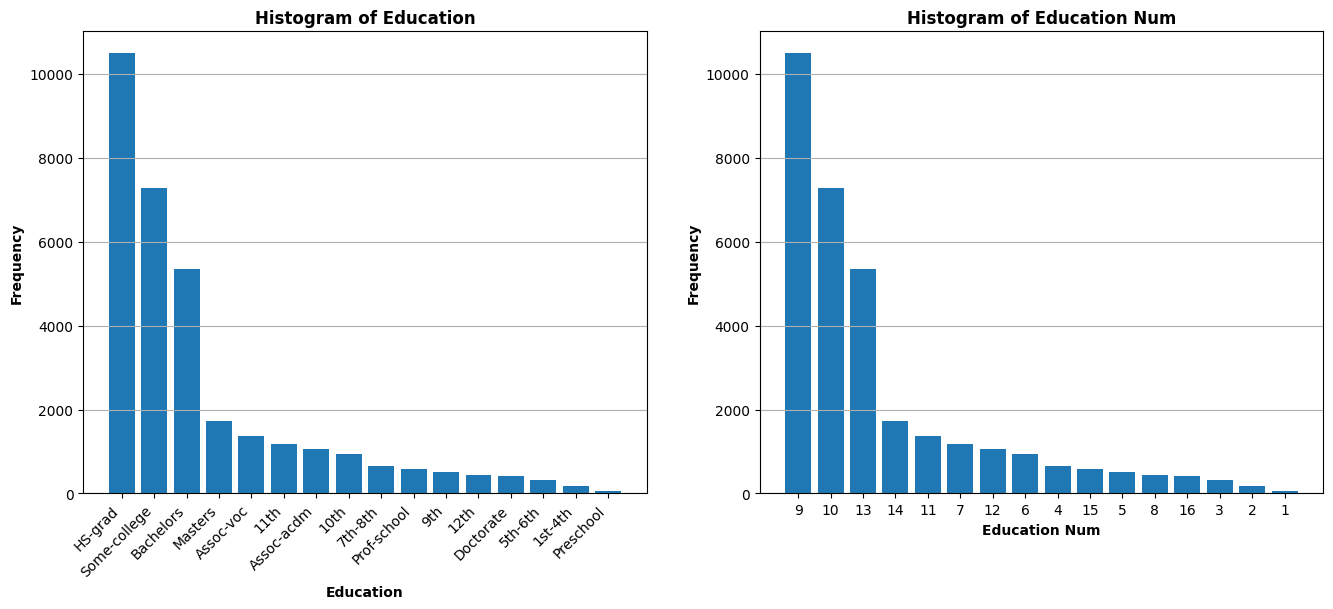

In [17]:
education_counts = new_data['education'].value_counts().sort_values(ascending=False)
education_num_counts = new_data['education.num'].value_counts().sort_values(ascending=False)
education_num_counts.index = education_num_counts.index.astype(str)

plt.figure(figsize=(16, 6))

# Istogramma per education
plt.subplot(1, 2, 1)
plt.bar(education_counts.index, education_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Education', fontweight='bold')
plt.grid(axis='y')

# Visualizzazione dell'istogramma di education.num
plt.subplot(1, 2, 2)
plt.bar(education_num_counts.index, education_num_counts.values)
plt.xlabel('Education Num', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Education Num', fontweight='bold')
plt.grid(axis='y')

plt.show()

Notiamo che hanno praticamente la stessa distribuzione. Dato che una variabile numerica è più facile da gestire si è preferito rimuovere la feature "Education".

In [18]:
new_data.drop(columns=['education'], inplace=True)

A questo punto, è conviene lanciare un ensamble learning, in particolare un "Random Forest". Il "Random Forest" è molto utile non solo per le capacità predittive che possiede, ma anche per la sua abilità nel fornire una stima in merito all'importanza delle feature nel dataset. Questa "importanza" è stabilita sulla base dell'impatto medio di una feature sulla riduzione dell'impurità. **Se una feature è poco informativa si può anche toglierla**.

Conviene sostituire, per le feature categoriche binarie, valori 0 ed 1.

In [19]:
# Preparazione del dataset
new_data['income'] = new_data['income'].map({'<=50K': 0, '>50K': 1})
new_data['sex'] = new_data['sex'].map({'Male': 1, 'Female': 0})

Per la gestione delle variabili categoriche si è deciso di fare uso di un one-hot encoding. Altre strategie che richiedono l'assegnamento di una sequenza di interi alle varie categorie risultano essere poco ottimali dal momento che stabiliscono un ordinamento tra le varie categorie, un'operazione priva di senso nel nostro caso.

In [20]:
train_set = pd.get_dummies(new_data.drop(columns=['income']))

Il seguente Random Forest ha 500 Decision Tree, ciascuno dei quali viene addrestrato su un train set costruito con rimpiazzo a partire da quello di partenza e ha un numero massimo di nodi pari a 16. L'ensemble introduce in automatico più randomicità quando costruisce gli alberi, infatti quando deve scegliere la migliore feature per suddividere un nodo, la cerca in un sottoinsieme random e non tra tutte.

In [21]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(train_set, new_data['income'])

coppie = list(zip(train_set.columns, rnd_clf.feature_importances_))
feature_importances_sorted = sorted(coppie, key=lambda x: x[1], reverse=True)
for name, score in feature_importances_sorted:
    print(f"{name}: {score:.4f}")

marital.status_Married-civ-spouse: 0.1879
capital.gain: 0.1426
education.num: 0.1410
relationship_Husband: 0.1323
marital.status_Never-married: 0.0631
age: 0.0595
hours.per.week: 0.0446
occupation_Exec-managerial: 0.0336
capital.loss: 0.0329
relationship_Own-child: 0.0260
sex: 0.0247
relationship_Not-in-family: 0.0219
relationship_Wife: 0.0132
occupation_Other-service: 0.0104
marital.status_Divorced: 0.0094
occupation_Prof-specialty: 0.0092
relationship_Unmarried: 0.0089
workclass_Self-emp-inc: 0.0070
occupation_Farming-fishing: 0.0036
workclass_Private: 0.0031
occupation_Handlers-cleaners: 0.0028
occupation_Craft-repair: 0.0025
occupation_Machine-op-inspct: 0.0023
relationship_Other-relative: 0.0020
workclass_Self-emp-not-inc: 0.0016
native.country_Mexico: 0.0016
workclass_Federal-gov: 0.0015
marital.status_Widowed: 0.0014
occupation_Transport-moving: 0.0014
race_Black: 0.0013
race_White: 0.0011
marital.status_Separated: 0.0011
occupation_Adm-clerical: 0.0010
occupation_Tech-support: 

Sembra conveniente rimuovere da "capital.loss" in poi tutte le feature dal momento che hanno un'importanza al di sotto del 3% circa.

In [22]:
selected_features = [name for name, score in feature_importances_sorted if score > 0.03]
train_set = train_set[selected_features]

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(train_set, new_data['income'])

coppie = list(zip(train_set.columns, rnd_clf.feature_importances_))
coppie_sorted = sorted(coppie, key=lambda x: x[1], reverse=True)
for name, score in coppie_sorted:
    print(f"{name}: {score:.4f}")

marital.status_Married-civ-spouse: 0.2694
capital.gain: 0.2222
education.num: 0.1948
relationship_Husband: 0.1507
capital.loss: 0.0388
marital.status_Never-married: 0.0377
age: 0.0363
hours.per.week: 0.0269
occupation_Exec-managerial: 0.0233


Alla luce di ciò, si è deciso di mantenere solo queste feature.

In [34]:
data = train_set.copy()
target = new_data['income'].to_frame() # trasformo la Series in un DataFrame
target.columns = ['income']

### Modifiche forse unitili sulle variabili categoriche

In [ ]:
columns_to_keep = [col for col in train_set.columns if not col.startswith('native.country') or col in ['native.country_United-States', 'native.country_Mexico']]
train_set = train_set[columns_to_keep]

Valutiamo se considerare la variazione di capitale ha più senso di avere le due feature separate. <br>
Per prima cosa è necessario codificare la variabile target sostituendo "<=50K" con 1 e ">50K" con 0.

In [ ]:
new_data['income'] = new_data['income'].map({'<=50K': 0, '>50K': 1})

In [23]:
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["income"].sort_values()

capital.loss      0.150529
capital.gain      0.223319
hours.per.week    0.229543
age               0.234051
education.num     0.335166
income            1.000000
Name: income, dtype: float64

In [ ]:
new_data['capital_variation'] = new_data['capital.gain'] - new_data['capital.loss']/2
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K                -1.000000
education.num       -0.335300
age                 -0.242030
hours.per.week      -0.229307
capital.gain        -0.221184
capital_variation   -0.216817
capital.loss        -0.150054
fnlwgt               0.008829
<=50K                1.000000
Name: <=50K, dtype: float64

La nuova feature 'capital_variation' ha una correlazione superiore alla correlazione media tra 'capital.gain' e 'capital.loss' (pari a 0.185619)!

In [ ]:
new_data.drop(columns=['capital.gain'], inplace=True)
new_data.drop(columns=['capital.loss'], inplace=True)

In [ ]:
new_data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,<=50K,>50K,capital_variation
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,True,False,-2178.0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,True,False,-1950.0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,True,False,-1950.0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K,True,False,-1885.0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K,True,False,-1885.0


Consideriamo la categoria 'Workclass' come segue.

<Figure size 1400x800 with 0 Axes>

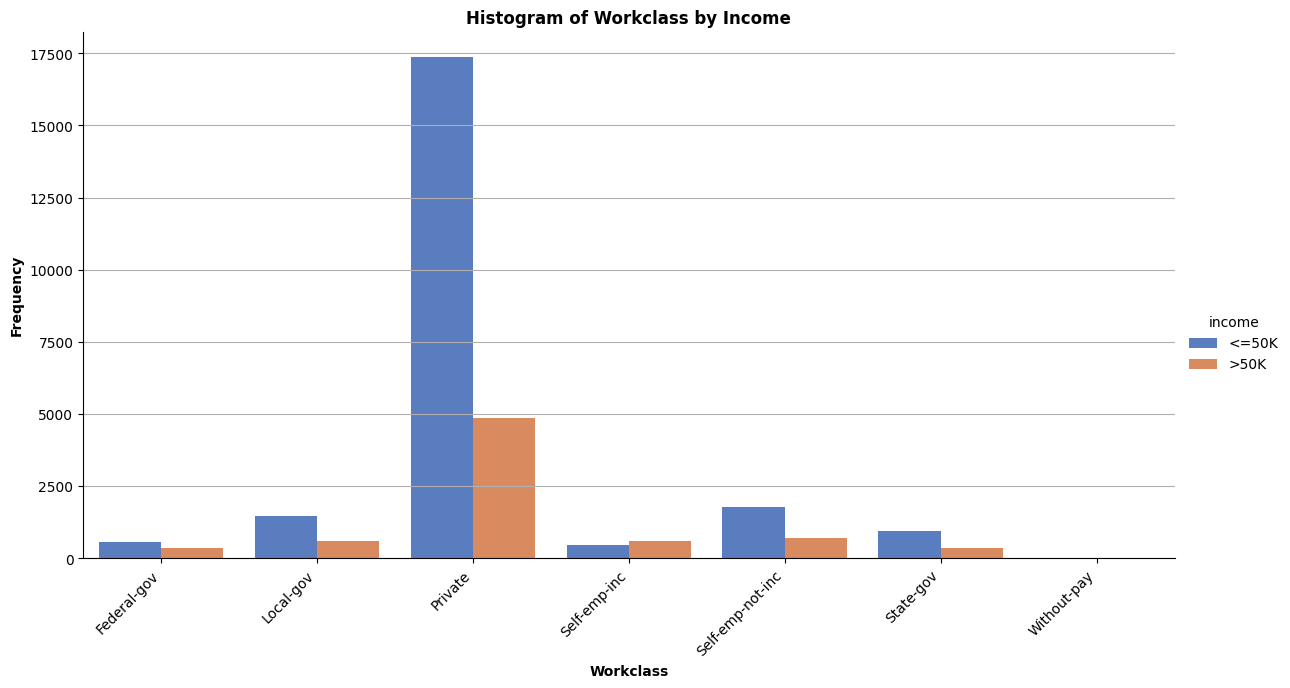

In [ ]:
import seaborn as sns
workclass_counts = new_data.groupby(['workclass', 'income']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.catplot(data=workclass_counts, x='workclass', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Workclass', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Workclass by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

Prima di unire le classe, dato che non sono più molto scarne come per la feature 'Native.country', è bene visualizzare lo stesso grafico ma normalizzato, in modo da capire come si distribuisce meglio 'income' tra le varie categorie.

<Figure size 1400x800 with 0 Axes>

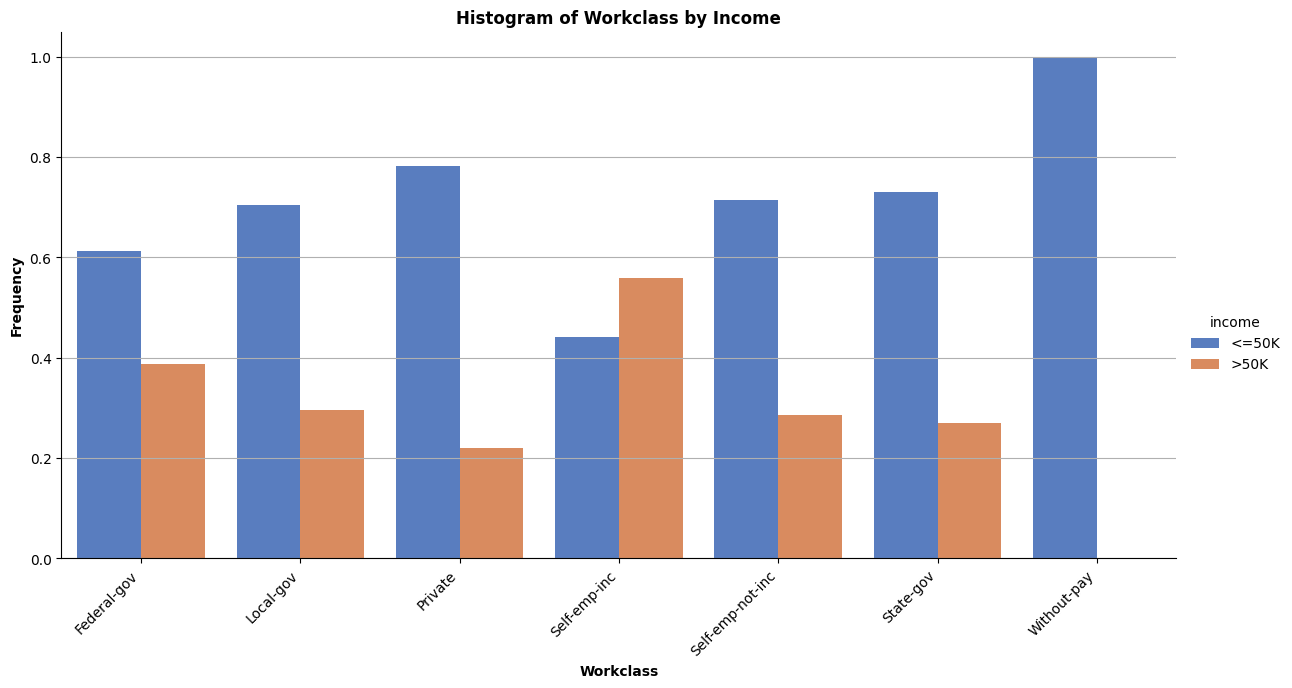

In [ ]:
proportional_data = new_data.groupby(['workclass', 'income']).size().reset_index(name='count')
total_counts_per_workclass = proportional_data.groupby('workclass')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts_per_workclass

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='workclass', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Workclass', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Workclass by Income', fontweight='bold')
plt.grid(axis='y')

Può sembrare una buona idea unire 'Local-gov' e 'State-gov' sotto un'unica feature: 'Gov'. Un ragionamento analogo può essere fatto con 'Self-emp-not-inc' e 'Private'. <br>

*Per quanto riguarda 'Without-pay' che conta un numero di istanze pari a 14, si è decido di unire a questi la categoria 'Never-worked' che conta appena tot istanze (evidentemente sono state eliminate dal momento che contenevano '?').*



In [ ]:
new_data['workclass'] = new_data['workclass'].replace({'Local-gov': 'Gov', 'State-gov': 'Gov'})
new_data['workclass'] = new_data['workclass'].replace({'Self-emp-not-inc': 'Private'})
print(new_data['workclass'].value_counts())

workclass
Private         24752
Gov              3344
Self-emp-inc     1073
Federal-gov       943
Without-pay        14
Name: count, dtype: int64


Visualizziamo adesso la feature 'marital.status'.

<Figure size 1400x800 with 0 Axes>

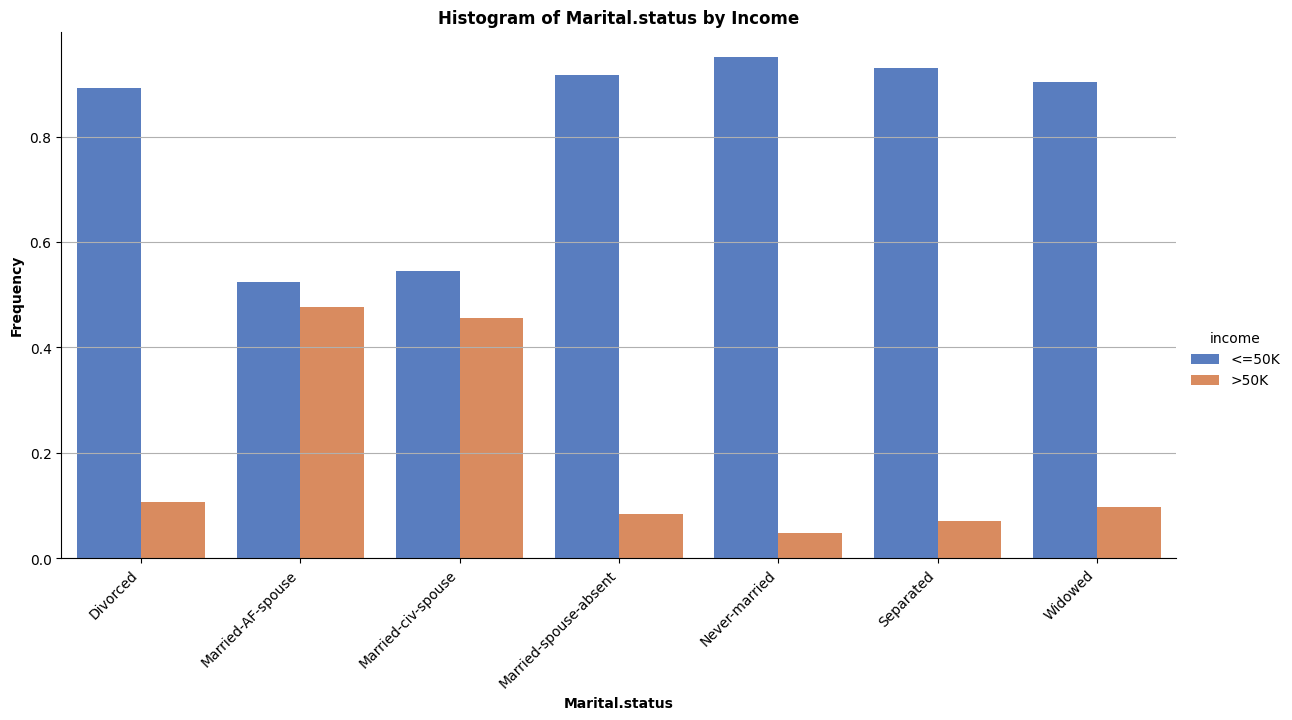

In [ ]:
proportional_data = new_data.groupby(['marital.status', 'income']).size().reset_index(name='count')
total_counts = proportional_data.groupby('marital.status')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='marital.status', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Marital.status', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Marital.status by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

Sembra sensato anche in questo caso unire la categoria 'Divorced', 'Separated', 'Widowed', 'Married-AF-Spouse' e 'Married-spouse-absent' sotto un'unica: 'Without-spouse'.

In [ ]:
new_data['marital.status'] = new_data['marital.status'].replace({
    'Divorced': 'Without-spouse',
    'Separated': 'Without-spouse',
    'Widowed': 'Without-spouse',
    'Married-AF-spouse': 'Without-spouse',
    'Married-spouse-absent': 'Without-spouse'
})

print(new_data['marital.status'].value_counts())

marital.status
Married-civ-spouse    14055
Never-married          9708
Without-spouse         6363
Name: count, dtype: int64


Si considera la feature 'relationship'.

<Figure size 1400x800 with 0 Axes>

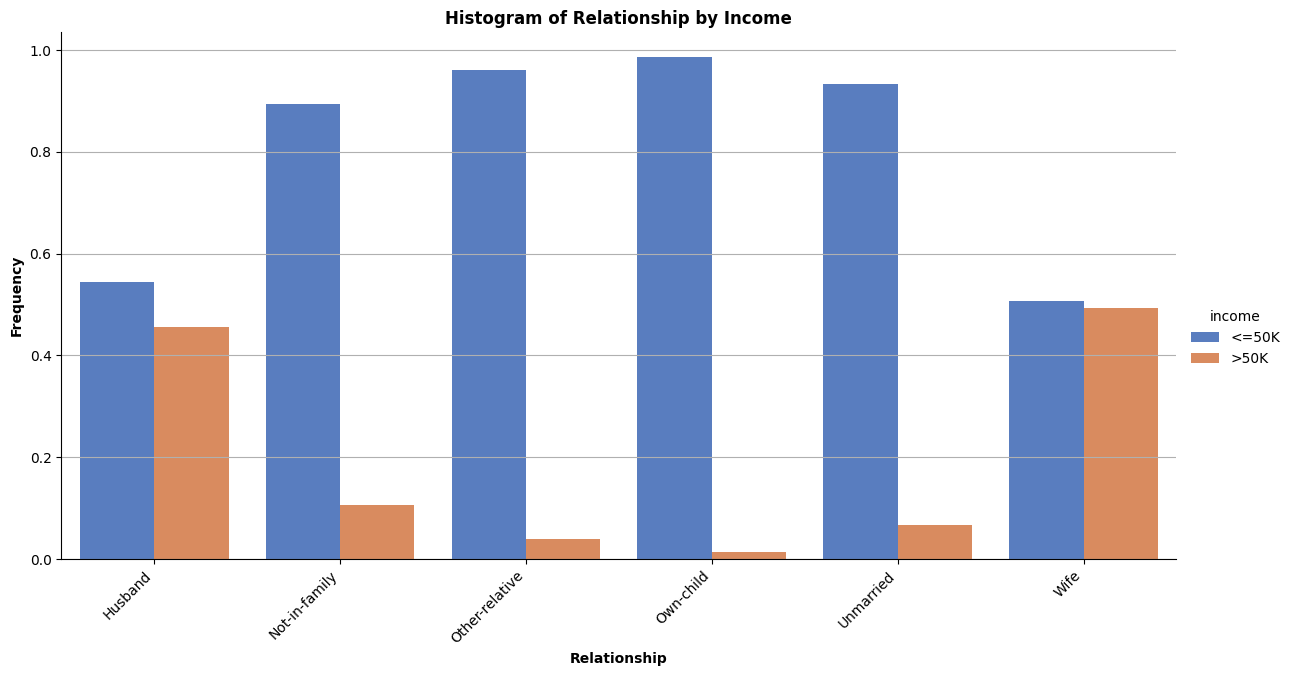

In [ ]:
proportional_data = new_data.groupby(['relationship', 'income']).size().reset_index(name='count')
total_counts = proportional_data.groupby('relationship')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='relationship', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Relationship', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Relationship by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

Anche in questo caso sembra quasi naturale unire sotto un'unica categoria "Not-in-family", "Other-relative", "Own-child" e "Unmarried".

In [ ]:
new_data['relationship'] = new_data['relationship'].replace({
    'Not-in-family': 'Other',
    'Other-relative': 'Other',
    'Own-child': 'Other',
    'Unmarried': 'Other'
})

print(new_data['relationship'].value_counts())

relationship
Other      16267
Husband    12453
Wife        1406
Name: count, dtype: int64


Per la feature 'race' si procede allo stesso modo. In questo caso si è deciso di unire 'Amer-Indian-Eskimo' in 'Other' (per lo stesso motivo dei precedenti).

<Figure size 1400x800 with 0 Axes>

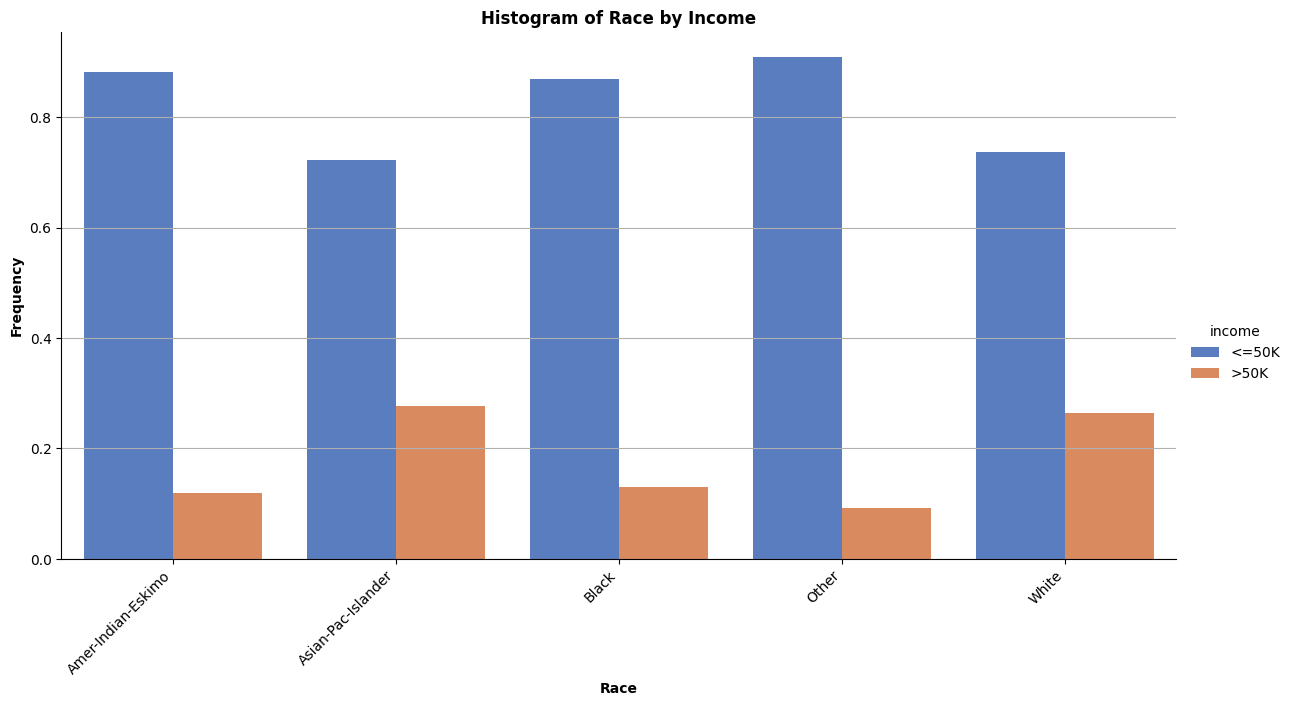

In [ ]:
proportional_data = new_data.groupby(['race', 'income']).size().reset_index(name='count')
total_counts = proportional_data.groupby('race')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='race', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Race', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Race by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

In [ ]:
new_data['race'] = new_data['race'].replace({ 'Amer-Indian-Eskimo': 'Other' })

print(new_data['race'].value_counts())

race
White                 25903
Black                  2812
Asian-Pac-Islander      894
Other                   517
Name: count, dtype: int64


Si potrebbe pensare di unire anche 'Black' con la nuova 'Other' ma ciò non sarebbe conveniente dato che la razza 'Black' è presente in un numero molto più elevato di istanze rispetto a 'Amer-Indian-Eskimo' che è quasi una minoranza etnica. Allo stesso modo si potrebbe pensare di unire 'Asian-Pac-Islander' con 'White', tuttavia si è deciso di lasciarla almeno in questa prima fase di pre-processing.

### Analisi varie

Sarebbe interessante vedere come, a parità di livello di educazione raggiunta, come varia l'occupazione al variare dell'età. E' forse possibile che, essendo più giovani, è possibile raggiungere delle occupazioni più meritevoli rispetto ad essere più grandi?

Sarebbe altrettanto interessante vedere come, a parità di educatione, è possibile raggiungere occupazioni più meritevoli.
Oppure se l'educazione incide effettivamente sulle occupazioni che è possibile raggiungere.
Oppure se avere un'alta educazione consente di raggiungere occupazioni più alte ma in meno tempo rispetto ad avere un'educazione più bassa.


Iniziamo per prima cosa a visualizzare le varie distribuzioni per cercare di capire come variano.

In [1]:
import seaborn as sns
sns.histplot(new_data['age'], kde=True)

NameError: name 'new_data' is not defined

Questo plot è abbastanza verosimile dal momento che, in genere, sono poche le persone che continuano a lavorare in tarda età, considerando che l'età media di pensionamento negli Stati Uniti è 62 anni.

In [ ]:
value_counts = new_data['workclass'].value_counts().reset_index()
fig = px.bar(value_counts, x='workclass', y='count', title=f'Workclass')
fig.show()

La maggior parte delle persone lavora nel privato, quasi 2500 lavorano per se stessi, ma non hanno una propria struttura aziendale come una società. Il resto lavora nel governo locale (ruoli all'interno delle amministrazioni comunali, provinciali, ecc.), nel governo statale, possiede e gestisce la propria impresa (lavoro prevalentemente proprio e senza vincolo di subordinazione nei confronti di un committente), ed infine nel governo federale. Solo 14 dei lavoratori presenti nel dataset lavora senza essere pagato.

In [ ]:
value_counts = new_data['education.num'].value_counts().reset_index()
fig = px.bar(value_counts, x='education.num', y='count', title=f'Education.num')
fig.show()

Questa feature rappresenta il numero di anni impiegati per raggiungere il livello di istruzione rappresentato precedentemente.

In [ ]:
value_counts = new_data['marital.status'].value_counts().reset_index()
fig = px.bar(value_counts, x='marital.status', y='count', title=f'Marital.status')
fig.show()

La categoria “married-civ-spouse” si riferisce allo stato civile di una persona che è sposata e il coniuge è un civile, cioè non fa parte delle forze armate o non è un coniuge assente per motivi come il servizio militare. La categoria “married-AF-spouse” invece, fa riferimento a persone sposate con un coniuge che è nelle Forze Armate. La categoria “married-spouse-absent” si riferisce allo stato civile di una persona che è legalmente sposata, ma il coniuge è assente.

In [ ]:
value_counts = new_data['occupation'].value_counts().reset_index()
fig = px.bar(value_counts, x='occupation', y='count', title=f'Occupation')
fig.show()

“Prof-speciality” si riferisce a professioni che richiedono un alto livello di specializzazione e competenza, come medici, avvocati, ingegneri, scienziati e professori universitari. “craft-repair” si riferisce a mestieri e lavori di riparazione. Ad esempio, potrebbe includere elettricisti, idraulici, meccanici, falegnami e altri mestieri simili. “exec-managerial” si riferisce a ruoli di gestione esecutiva e manageriale, come direttori generali, direttori di dipartimento, manager di progetto e altri ruoli simili. “adm-clerical” si riferisce a una categoria di professioni che include ruoli amministrativi e di segreteria, come impiegati, assistenti amministrativi, segretari e altri ruoli simili. “sales” si riferisce a ruoli che riguardano la vendita di prodotti o servizi. Ad esempio, potrebbe includere venditori, rappresentanti di vendita, direttori delle vendite e altri ruoli simili.  “machine-op-inspct” si riferisce a una categoria di professioni che include operatori di macchine e ispettori. “protective-serv” si riferisce a ruoli nel settore dei servizi di protezione, come poliziotti, vigili del fuoco, guardie di sicurezza e altri ruoli simili.  “priv-house-serv” si riferisce a una categoria di professioni che include ruoli di servizio domestico privato, come governanti, cuochi privati, maggiordomi e altri ruoli simili.

In [ ]:
value_counts = new_data['relationship'].value_counts().reset_index()
fig = px.bar(value_counts, x='relationship', y='count', title=f'Relationship')
fig.show()

In [ ]:
value_counts = new_data['sex'].value_counts().reset_index()
fig = px.bar(value_counts, x='sex', y='count', title=f'Sex')
fig.show()

Sciuramente il plot è concorde con quello precedente in cui la percentuale di "husband" è nettamente superiore a quella di "wife".

In [ ]:
import plotly.express as px
import pandas as pd

value_counts = new_data['hours.per.week'].value_counts().reset_index()
value_counts.columns = ['hours.per.week', 'count']
value_counts = value_counts.sort_values(by='hours.per.week')

fig = px.bar(value_counts, x='hours.per.week', y='count', title='Hours.per.week')
fig.update_layout( yaxis_type="log", xaxis_title='Ore per settimana', yaxis_title='Conteggio (scala logaritmica)', bargap=0.5)
fig.show()


In [ ]:
value_counts = new_data['native.country'].value_counts().reset_index()
fig = px.bar(value_counts, x='native.country', y='count', title=f'Distribution of Native.country')
fig.show()

In [ ]:
value_counts = new_data[['<=50K', '>50K']].sum().reset_index(name='Count')
fig = px.bar(value_counts, x='index', y='Count', color='index',
             title='Distribution of Income', text='Count')

fig.show()

Si nota come il dataset risulta essere nettamente sbilanciato dal momento che le feature con income '<=50K' sono il 75% di quelle totali.

### Analisi interazioni tra feature

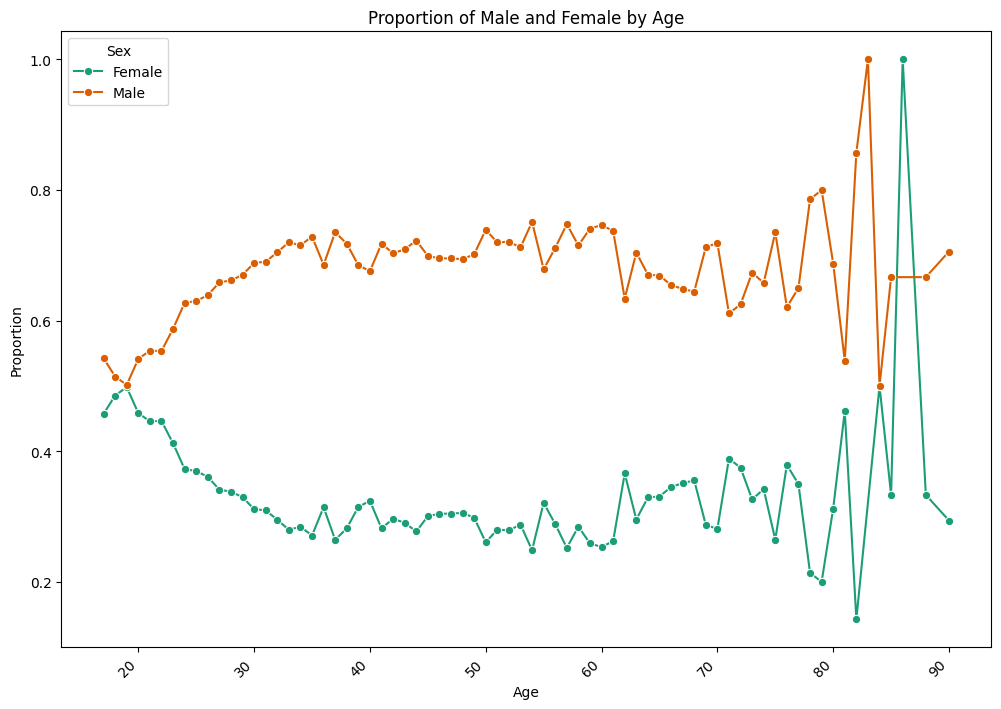

In [ ]:
# @title sex vs age

from matplotlib import pyplot as plt
import seaborn as sns

proportional_data = new_data.groupby(['age', 'sex']).size().reset_index(name='count')
total_counts_per_age = proportional_data.groupby('age')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts_per_age

plt.figure(figsize=(12, 8))
sns.lineplot(data=proportional_data, x='age', y='count', hue='sex', marker='o', palette='Dark2')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of Male and Female by Age')
plt.legend(title='Sex')
plt.xticks(rotation=45, ha='right')
plt.show()

Sicuramente possiamo affermare che dopo i 20 anni, la percentuale di uomini che lavora si mantiene in vantaggio rispetto a quella delle donne.

Sarebbe interessante capire quali sono i lavori svolti dalle persone over 70 dal momento che l'età media di pensionamento negli USA è attorno ai 62.

In [ ]:
filtered_data = new_data[new_data['age'] > 70]

proportional_data = filtered_data.groupby(['occupation', 'workclass']).size().reset_index(name='count')
total_counts_per_occupation = proportional_data.groupby('occupation')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts_per_occupation

fig = px.bar(proportional_data,
             x='occupation',
             y='count',
             color='workclass',
             title='Distribuzione delle Occupazioni per Persone con Età > 70 in base a Workclass',
             barmode='group')  # barmode='group' per barre raggruppate

fig.update_layout( xaxis_tickangle=-45, bargap=0.2)
fig.show()

Sicuramente i lavori che permettono ad un individuo di rimanere a lavorare oltre l'età media di pensionamento rigurdano il settore privato, e in particolare,"prof-speciality" e "adm-clarical" che per l'appunto sono lavori più "stazionari" dato che non richiedono alcuna particolare capacità fisica. Altri lavori più manuali come "craft-repair" o addirittura "protective-serv" hanno un conteggio molto basso come ci aspettavamo.  

In [ ]:
education_income_counts = new_data.groupby(['education.num', 'income']).size().reset_index(name='count')
fig = px.bar(education_income_counts,
             x='education.num',
             y='count',
             color='income',
             title='Distribuzione di Income in base a Education.num',
             barmode='group')

fig.update_layout(xaxis_title='Livello di istruzione', yaxis_title='Conteggio', xaxis_tickangle=-45)
fig.show()

## Estrazione del test set
Per evitare il fenomeno del "data snooping bias" mettiamo da parte delle istanze nel test set per evitare di commettere errori durante l'intero processo. <br>
Se lo split è random, possiamo estrarre un test set che non è rappresentativo del dataset originario. Quindi si usa uno **stratified sampling**. Così facendo è possibile evitare anche **sampling bias** che si possono creare durante l'operazione di estrazione random. Il processo si articola nelle seguenti fasi:
1. Suddivisione del dataset in strati
2. Ogni strato deve avere un numero sufficiente di istanze per ogni cateogoria specifica (almeno per l'attributo target). <br>


Questa fase è molto delicata perchè introdurre bias adesso significa compromettere tutto il processo di learning.



In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, target): # possiamo avere più split del dataset
    strat_train_set_1 = new_data.loc[train_index]
    strat_test_set_1 = new_data.loc[test_index]

In [36]:
strat_test_set_1["income"].value_counts() / len(strat_test_set_1)

income
0    0.759108
1    0.240892
Name: count, dtype: float64

In [37]:
strat_train_set_1["income"].value_counts() / len(strat_train_set_1)

income
0    0.759061
1    0.240939
Name: count, dtype: float64

Proprio come ci aspettavamo. <br>
Questa operazione potrebbe essere fatta considerando anche altre feature che sono molto significative nello spiegare la variabile target. Visualizziamo la matrice di correlazione di 'income'.

In [48]:
full_data = pd.concat([data, target], axis=1)

In [51]:
corr_matrix = full_data.corr()

In [54]:
corr_matrix['income'].sort_values(ascending=False)

income                               1.000000
marital.status_Married-civ-spouse    0.444622
relationship_Husband                 0.400934
education.num                        0.335166
age                                  0.234051
hours.per.week                       0.229543
capital.gain                         0.223319
occupation_Exec-managerial           0.215083
capital.loss                         0.150529
marital.status_Never-married        -0.318450
Name: income, dtype: float64

Si sceglie la feature 'marital.status_Married-civ-spouse' per bipartire il dataset dal momento che oltre ad avere un'alta correlazione, ha anche una "feature importance" elevata.

In [59]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(full_data, full_data['marital.status_Married-civ-spouse']): # possiamo avere più split del dataset
    strat_train_set_2 = full_data.loc[train_index]
    strat_test_set_2 = full_data.loc[test_index]

In [61]:
strat_test_set_2['marital.status_Married-civ-spouse'].value_counts() / len(strat_test_set_2)

marital.status_Married-civ-spouse
False    0.539892
True     0.460108
Name: count, dtype: float64

In [63]:
strat_train_set_2["marital.status_Married-civ-spouse"].value_counts() / len(strat_train_set_2)

marital.status_Married-civ-spouse
False    0.539836
True     0.460164
Name: count, dtype: float64

## Analisi correlazione

Si potrebbe pensare di usare un pairplot per la visualizzazione delle correlazioni.

In [ ]:
# Calcola la matrice di correlazione
correlation_matrix = new_data_encoded.corr()

# Visualizza la heatmap di correlazione
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

sns.pairplot(new_data_encoded)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ef8c354c820> (for post_execute):


KeyboardInterrupt: 